In [1]:
import pandas as pd
import numpy as np
import tqdm
import warnings
import matplotlib.pyplot as plt

pd.set_option("max_rows", 200)
pd.set_option("max_columns", 50)

%matplotlib inline

In [2]:
df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle")
df = df[df["user_id"] % 100 == 0]
df = df.sort_values(["user_id", "timestamp"])
large_user_id = df["user_id"].value_counts()
large_user_id = large_user_id[large_user_id > 1000] 
df = df[df["user_id"].isin(large_user_id.index)]
df = df[df["answered_correctly"] != -1]

In [3]:
def f(series):
    return series.shift(1).cumsum() / np.arange(len(series))

In [4]:
df = df[df["answered_correctly"] != -1]

In [5]:
df["te_content_id"] = df.groupby("content_id")["answered_correctly"].transform(f)

In [6]:
df["user_level"] = df.groupby("user_id")["te_content_id"].transform(f)

In [7]:
df["diff_user_level"] = df["te_content_id"] - df["user_level"]

In [8]:
df["diff_user_level"]

102369          NaN
102370          NaN
102371          NaN
102372          NaN
102373          NaN
             ...   
9833069    0.112510
9833070    0.206230
9833071    0.268675
9833072   -0.087243
9833073    0.049877
Name: diff_user_level, Length: 592844, dtype: float64

In [9]:
df.groupby("answered_correctly")["diff_user_level"].describe()

,count,mean,std,min,25%,50%,75%,max
answered_correctly,,,,,,,,
0,187707.0,-0.082062,0.208627,-0.780743,-0.214344,-0.072226,0.058487,0.986601
1,386773.0,0.050906,0.191814,-0.789264,-0.066449,0.064837,0.186640,1.000000


In [10]:
import seaborn as sns

findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans.


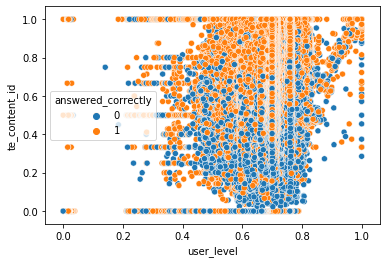

In [11]:
sns.scatterplot(data=df, x="user_level", y="te_content_id", hue="answered_correctly")

# こっから分析
* target encodingとかユーザー

In [43]:
df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle")
# df = df[df["user_id"] % 100 == 0]
df = df.sort_values(["user_id", "timestamp"])
# large_user_id = df["user_id"].value_counts()
# large_user_id = large_user_id[large_user_id > 1000] 
# df = df[df["user_id"].isin(large_user_id.index)]
df = df[df["answered_correctly"] != -1]

In [44]:
def f(series):
    return series.shift(1).cumsum() / np.arange(len(series))

In [45]:
df["te_content_id"] = df.groupby("content_id")["answered_correctly"].transform(f)

In [46]:
df["user_level"] = df.groupby("user_id")["te_content_id"].transform(f)

In [47]:
df["diff_user_level"] = df["te_content_id"] - df["user_level"]

In [48]:
df["user_level_bin"] = pd.cut(df["user_level"], 5)
df["te_content_id_bin"] = pd.cut(df["te_content_id"], 5)


In [49]:
pd.pivot_table(df, values="answered_correctly", index="user_level_bin", columns="te_content_id_bin", aggfunc="mean")

te_content_id_bin,"(-0.001, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
user_level_bin,,,,,
"(-0.001, 0.2]",0.619718,0.363636,0.571429,0.600000,0.757962
"(0.2, 0.4]",0.662429,0.363924,0.513770,0.639624,0.833694
"(0.4, 0.6]",0.214210,0.309398,0.532332,0.707077,0.867058
"(0.6, 0.8]",0.228438,0.326084,0.516842,0.699526,0.859808
"(0.8, 1.0]",0.333333,0.242665,0.398274,0.629568,0.857643


In [50]:
pd.pivot_table(df, values="answered_correctly", index="user_level_bin", columns="te_content_id_bin", aggfunc="count")

te_content_id_bin,"(-0.001, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
user_level_bin,,,,,
"(-0.001, 0.2]",142,22,49,30,157
"(0.2, 0.4]",708,948,2106,1171,2309
"(0.4, 0.6]",28318,333276,591899,583744,210024
"(0.6, 0.8]",32140,552728,1814123,3537931,2018886
"(0.8, 1.0]",63,1636,22015,19156,25717


In [ ]:
df["diff_user_level"] = df["te_content_id"] - df["user_level"]

In [53]:
df["diff_user_level_bin"] = pd.cut(df["diff_user_level"], 20)

In [54]:
df.groupby("diff_user_level_bin")["answered_correctly"].describe()

,count,mean,std,min,25%,50%,75%,max
diff_user_level_bin,,,,,,,,
"(-1.002, -0.9]",11.0,0.363636,0.504525,0.0,0.0,0.0,1.0,1.0
"(-0.9, -0.8]",24.0,0.416667,0.503610,0.0,0.0,0.0,1.0,1.0
"(-0.8, -0.7]",672.0,0.441964,0.496990,0.0,0.0,0.0,1.0,1.0
"(-0.7, -0.6]",3438.0,0.413322,0.492501,0.0,0.0,0.0,1.0,1.0
"(-0.6, -0.5]",19574.0,0.198988,0.399250,0.0,0.0,0.0,0.0,1.0
"(-0.5, -0.4]",151776.0,0.251054,0.433621,0.0,0.0,0.0,1.0,1.0
"(-0.4, -0.3]",348164.0,0.318772,0.466001,0.0,0.0,0.0,1.0,1.0
"(-0.3, -0.2]",723443.0,0.394460,0.488735,0.0,0.0,0.0,1.0,1.0
"(-0.2, -0.1]",1265290.0,0.499278,0.500000,0.0,0.0,0.0,1.0,1.0


In [60]:
df[(df["diff_user_level"] < -0.5) & (df["diff_user_level"] > -0.6)][["te_content_id", "user_level", "answered_correctly"]].tail(100)

,te_content_id,user_level,answered_correctly
9764638,0.140156,0.656289,0
9764713,0.103044,0.653119,0
9764842,0.083207,0.648665,0
9765498,0.149466,0.660982,0
9765601,0.133733,0.661676,0
9765708,0.163981,0.664835,0
9766429,0.159686,0.674505,0
9768069,0.187801,0.703705,0
9768116,0.176991,0.703428,0
9768121,0.149201,0.703437,0


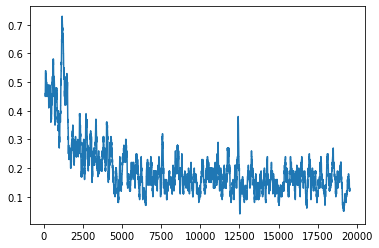

In [63]:
df[(df["diff_user_level"] < -0.5) & (df["diff_user_level"] > -0.6)]["answered_correctly"].reset_index(drop=True).rolling(window=100).mean().plot()

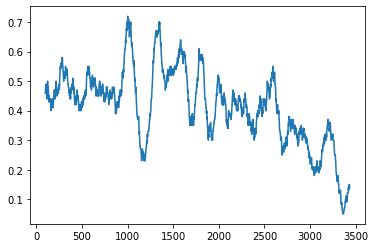

In [62]:
df[(df["diff_user_level"] < -0.6) & (df["diff_user_level"] > -0.7)]["answered_correctly"].reset_index(drop=True).rolling(window=100).mean().plot()

In [61]:
df[(df["diff_user_level"] < -0.6) & (df["diff_user_level"] > -0.7)][["te_content_id", "user_level", "answered_correctly"]].tail(100)

,te_content_id,user_level,answered_correctly
7756839,0.080925,0.748669,0
7812626,0.221393,0.844028,0
7830203,0.142857,0.775520,0
7842945,0.079545,0.685176,0
7858788,0.125000,0.763471,0
7865705,0.083333,0.717017,0
7882115,0.079245,0.690122,0
7886417,0.137717,0.757434,0
7893674,0.101108,0.712932,0
7940499,0.000000,0.631934,0


In [66]:
df["answered_correctly"].mean()

0.6550183978884156

In [68]:
def f(series):
    initial_weight = 200
    
    return (series.shift(1).cumsum() + 0.655*initial_weight) / (np.arange(len(series)) + initial_weight)

In [69]:
df["te_content_id"] = df.groupby("content_id")["answered_correctly"].transform(f)
df["user_level"] = df.groupby("user_id")["te_content_id"].transform(f)
df["diff_user_level"] = df["te_content_id"] - df["user_level"]

In [70]:
df["user_level_bin"] = pd.cut(df["user_level"], 5)
df["te_content_id_bin"] = pd.cut(df["te_content_id"], 5)


In [71]:
pd.pivot_table(df, values="answered_correctly", index="user_level_bin", columns="te_content_id_bin", aggfunc="mean")

te_content_id_bin,"(0.168, 0.323]","(0.323, 0.478]","(0.478, 0.633]","(0.633, 0.788]","(0.788, 0.943]"
user_level_bin,,,,,
"(0.19, 0.3]",NaN,NaN,1.000000,0.879257,NaN
"(0.3, 0.41]",NaN,NaN,NaN,0.791452,NaN
"(0.41, 0.52]",NaN,NaN,NaN,0.744536,NaN
"(0.52, 0.63]",0.309232,0.426331,0.591811,0.774353,0.903063
"(0.63, 0.74]",0.239556,0.352524,0.514384,0.732982,0.881241


In [72]:
pd.pivot_table(df, values="answered_correctly", index="user_level_bin", columns="te_content_id_bin", aggfunc="count")

te_content_id_bin,"(0.168, 0.323]","(0.323, 0.478]","(0.478, 0.633]","(0.633, 0.788]","(0.788, 0.943]"
user_level_bin,,,,,
"(0.19, 0.3]",NaN,NaN,1.0,969.0,NaN
"(0.3, 0.41]",NaN,NaN,NaN,1357.0,NaN
"(0.41, 0.52]",NaN,NaN,NaN,732.0,NaN
"(0.52, 0.63]",42971.0,157148.0,430739.0,487394.0,85746.0
"(0.63, 0.74]",235632.0,600433.0,2140322.0,4652013.0,943841.0


In [73]:
df["diff_user_level"] = df["te_content_id"] - df["user_level"]

In [74]:
df["diff_user_level_bin"] = pd.cut(df["diff_user_level"], 20)

In [75]:
df.groupby("diff_user_level_bin")["answered_correctly"].describe()

,count,mean,std,min,25%,50%,75%,max
diff_user_level_bin,,,,,,,,
"(-0.56, -0.51]",167.0,0.155689,0.363650,0.0,0.0,0.0,0.0,1.0
"(-0.51, -0.46]",15374.0,0.162222,0.368666,0.0,0.0,0.0,0.0,1.0
"(-0.46, -0.41]",41550.0,0.204043,0.403006,0.0,0.0,0.0,0.0,1.0
"(-0.41, -0.361]",68241.0,0.243710,0.429323,0.0,0.0,0.0,0.0,1.0
"(-0.361, -0.311]",177885.0,0.265492,0.441596,0.0,0.0,0.0,1.0,1.0
"(-0.311, -0.261]",168821.0,0.303410,0.459732,0.0,0.0,0.0,1.0,1.0
"(-0.261, -0.212]",230799.0,0.349885,0.476934,0.0,0.0,0.0,1.0,1.0
"(-0.212, -0.162]",412027.0,0.408587,0.491573,0.0,0.0,0.0,1.0,1.0
"(-0.162, -0.113]",594404.0,0.460320,0.498423,0.0,0.0,0.0,1.0,1.0


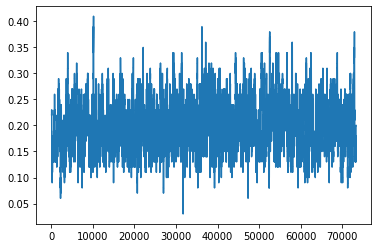

In [77]:
df[(df["diff_user_level"] < -0.4)]["answered_correctly"].reset_index(drop=True).rolling(window=100).mean().plot()

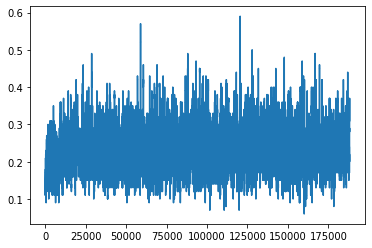

In [83]:
df[df["te_content_id"] < 0.3]["answered_correctly"].reset_index(drop=True).rolling(window=100).mean().plot()